In [1]:
%pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.2 MB/s eta 0:00:00


Conjunto Fuzzy - Gauss

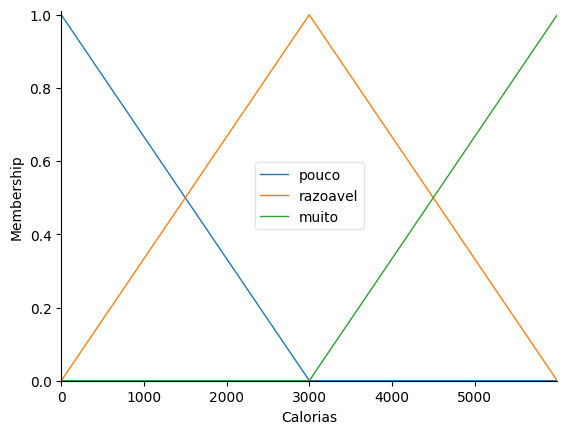

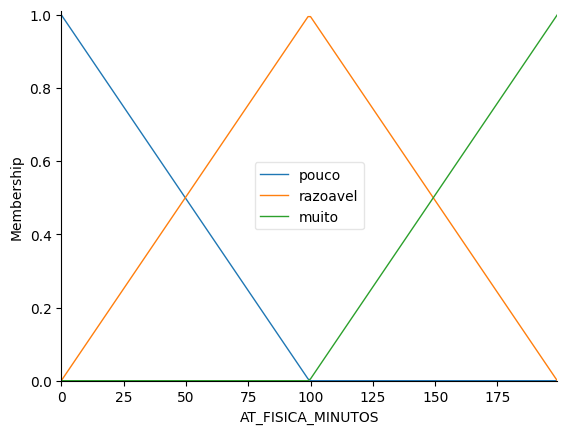

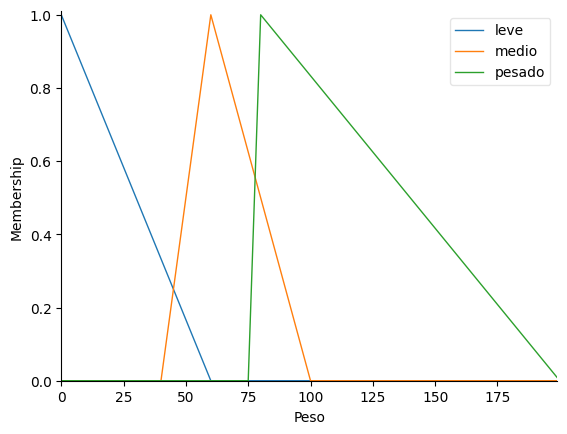

In [4]:
#variaveis de entrada
calorias = ctrl.Antecedent(np.arange(0, 6000, 2), 'Calorias')
tempo_atividade_fisica = ctrl.Antecedent(np.arange(0, 200, 1), "AT_FISICA_MINUTOS")

#variaveis de saida
peso = ctrl.Consequent(np.arange(0, 200, 1), 'Peso')

#funcoes de pertinencia
calorias.automf(names=['pouco', 'razoavel', 'muito'])
tempo_atividade_fisica.automf(names=['pouco', 'razoavel', 'muito'])

#categorias do peso
peso['leve'] = fuzz.trimf(peso.universe, [0, 0, 60])
peso['medio'] = fuzz.trimf(peso.universe, [40, 60, 100])
peso['pesado'] = fuzz.trimf(peso.universe, [75, 80, 200])

calorias.view()
tempo_atividade_fisica.view()
peso.view()

89.00001030758953


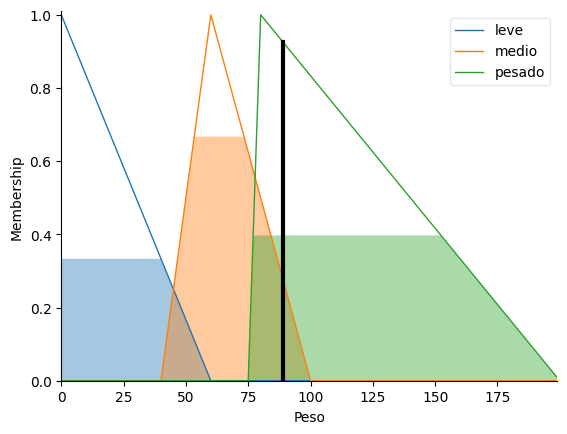

In [6]:
#criando regras
regra_1 = ctrl.Rule(calorias['pouco'], peso['leve'])
regra_2 = ctrl.Rule(calorias['razoavel'], peso['medio'])
regra_3 = ctrl.Rule(calorias['muito'], peso['pesado'])
regra_4 = ctrl.Rule(tempo_atividade_fisica['pouco'], peso['pesado'])
regra_5 = ctrl.Rule(tempo_atividade_fisica['razoavel'], peso['medio'])
regra_6 = ctrl.Rule(tempo_atividade_fisica['muito'], peso['leve'])

controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3, regra_4, regra_5, regra_6])

#simulacao
CalculoPeso = ctrl.ControlSystemSimulation(controlador)

CalculoPeso.input['Calorias'] = 2000
CalculoPeso.input['AT_FISICA_MINUTOS'] = 60


#computando o resultado
CalculoPeso.compute()

print(CalculoPeso.output['Peso'])
peso.view(sim=CalculoPeso)

Conjunto Fuzzy - Gauss

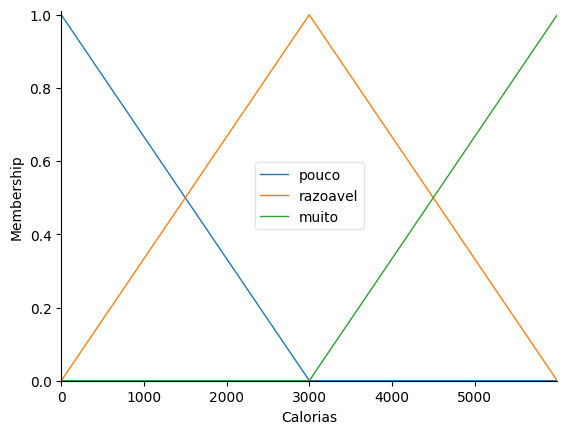

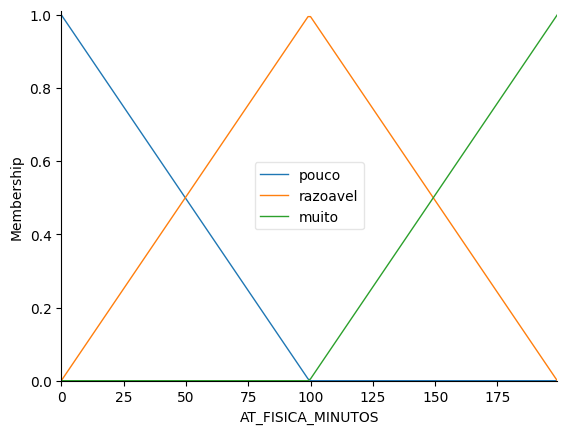

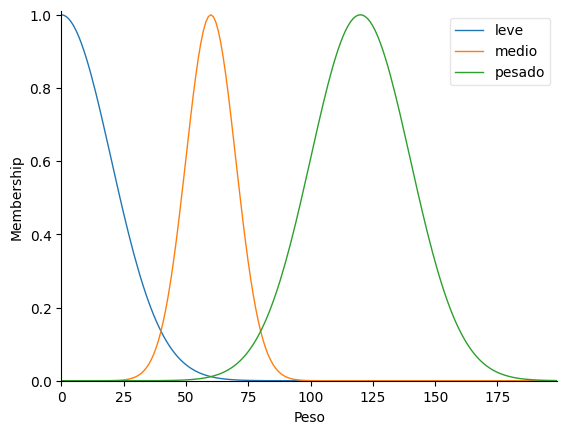

In [8]:
#variaveis de entrada
calorias = ctrl.Antecedent(np.arange(0, 6000, 2), 'Calorias')
tempo_atividade_fisica = ctrl.Antecedent(np.arange(0, 200, 1), "AT_FISICA_MINUTOS")

#variaveis de saida
peso = ctrl.Consequent(np.arange(0, 200, 1), 'Peso')

#funcoes de pertinencia
calorias.automf(names=['pouco', 'razoavel', 'muito'])
tempo_atividade_fisica.automf(names=['pouco', 'razoavel', 'muito'])

#categorias do peso
peso['leve'] = fuzz.gaussmf(peso.universe, 0,20)
peso['medio'] = fuzz.gaussmf(peso.universe,60,10 )
peso['pesado'] = fuzz.gaussmf(peso.universe, 120,20)

calorias.view()
tempo_atividade_fisica.view()
peso.view()

81.11358643182844


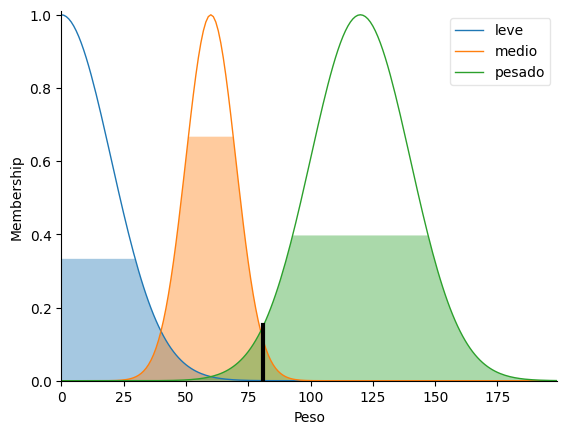

In [9]:
#criando regras
regra_1 = ctrl.Rule(calorias['pouco'], peso['leve'])
regra_2 = ctrl.Rule(calorias['razoavel'], peso['medio'])
regra_3 = ctrl.Rule(calorias['muito'], peso['pesado'])
regra_4 = ctrl.Rule(tempo_atividade_fisica['pouco'], peso['pesado'])
regra_5 = ctrl.Rule(tempo_atividade_fisica['razoavel'], peso['medio'])
regra_6 = ctrl.Rule(tempo_atividade_fisica['muito'], peso['leve'])

controlador = ctrl.ControlSystem([regra_1, regra_2, regra_3, regra_4, regra_5, regra_6])

#simulacao
CalculoPeso = ctrl.ControlSystemSimulation(controlador)

CalculoPeso.input['Calorias'] = 2000
CalculoPeso.input['AT_FISICA_MINUTOS'] = 60

#computando o resultado
CalculoPeso.compute()

print(CalculoPeso.output['Peso'])
peso.view(sim=CalculoPeso)